# Sales Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(7.5, 5.5)})

from itertools import combinations
from collections import Counter


In [2]:
import sweetviz as sv

c:\Users\Abhay\Visual_Studio_projects\Sales_Analysis\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pd.set_option("display.precision", 2)

Setting flot_format

In [4]:
pd.options.display.float_format = '{:.2f}'.format

## 1) Merge the 12 months sales data into a single csv file

In [5]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
files = [ file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

In [8]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## 2) Exporting Merged Data to a New CSV

In [9]:
all_months_data.to_csv('all_data.csv', index=False)

## 3) Importing Merged Dataset

In [10]:
all_data = pd.read_csv('all_data.csv',)

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning and Data Quality ( Accuracy, Completeness, Consistency, Uniqueness)

## 4) Check Shape of the Merged DataSet

In [12]:
all_data.shape

(186850, 6)

In [13]:
print("Numer of Rows:", all_data.shape[0])
print("Numer of Columns:", all_data.shape[1])

Numer of Rows: 186850
Numer of Columns: 6


## 5) Check for NAs/Missing ( Completeness)

In [14]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## 6) Drop NAs... where all columns are NAs

In [15]:
all_data.dropna(how='all',inplace = True)

In [16]:
all_data.reset_index(drop=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## 7) Check Updated shape. 

In [17]:
print("Numer of Rows:", all_data.shape[0])
print("Numer of Columns:", all_data.shape[1])

Numer of Rows: 186305
Numer of Columns: 6


## 8) Check for NAs in the updated Dataset

In [18]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## 9) Check info of the Dataset

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## 10) Check Duplicates(Uniqueness)

In [20]:
all_data.duplicated().sum()

618

In [21]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


## 11) Drop Duplicates. Also, there are 'Column Names' repeated. Drop all of them

In [22]:
all_data.drop_duplicates(inplace=True)

## 12) Check if Duplicates and 'Column Names are removed'

In [23]:
all_data[all_data['Product'] == 'Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Observation: There is 1 ROW with repeated 'Column Name'. Drop that ROW

## 13) Drop the ROW with the 'Column Names'

In [24]:
all_data.drop(all_data[all_data['Product'] == 'Product'].index,inplace= True)

## 14) Reset Index

In [25]:
all_data.reset_index(drop=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## 15) Verify if the Row is deleted.

In [26]:
all_data[all_data['Product']=='Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Obervation: The Repeated Column Names in the dataset are deleted

## 16) Order Date data type is Object. Convert to Datetime ( Accuracy of Data)

In [27]:
all_data['Order Date'].head()

0    04/19/19 08:46
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
5    04/30/19 09:27
Name: Order Date, dtype: object

In [28]:
all_data['Converted_Order_Date'] =  pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M')

## 16) Validate the Data Type

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Order ID              185686 non-null  object        
 1   Product               185686 non-null  object        
 2   Quantity Ordered      185686 non-null  object        
 3   Price Each            185686 non-null  object        
 4   Order Date            185686 non-null  object        
 5   Purchase Address      185686 non-null  object        
 6   Converted_Order_Date  185686 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 11.3+ MB


##  Exploring DATA

## 16) Univariate

In [30]:
all_data['Product'].value_counts().head(5)

USB-C Charging Cable        21859
Lightning Charging Cable    21610
AAA Batteries (4-pack)      20612
AA Batteries (4-pack)       20558
Wired Headphones            18849
Name: Product, dtype: int64

Observation: These are the top 5 electronic products sold.

<AxesSubplot: xlabel='count', ylabel='Product'>

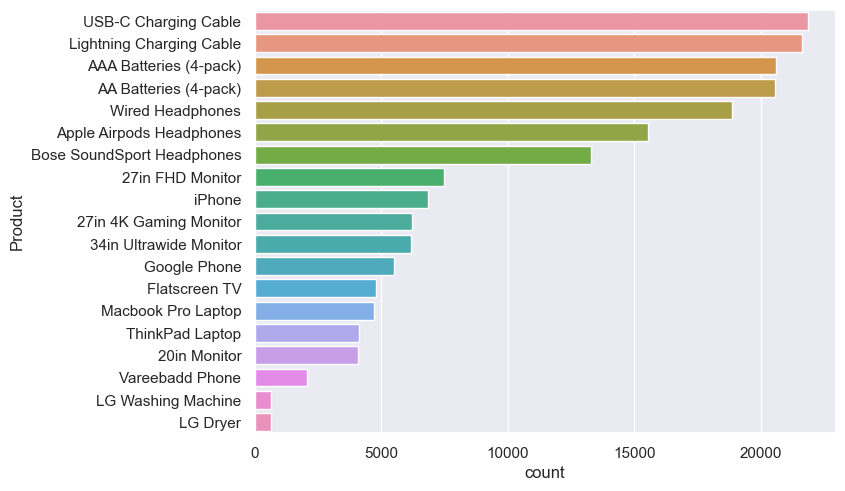

In [31]:
sns.countplot(y=all_data['Product'], order= all_data['Product'].value_counts().index)

In [32]:
all_data.Product.value_counts().tail()

ThinkPad Laptop       4126
20in Monitor          4098
Vareebadd Phone       2065
LG Washing Machine     666
LG Dryer               646
Name: Product, dtype: int64

Observation: These are the bottom 5 electronic products sold.

## 17) Check distribution of ordered quantity

In [33]:
all_data['Quantity Ordered'].value_counts()

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

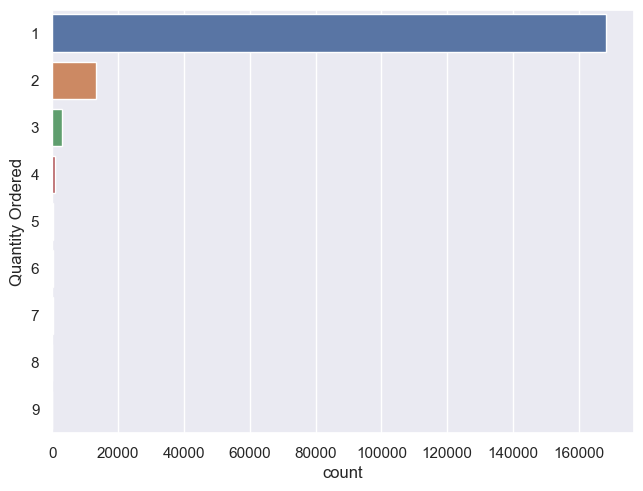

In [34]:
sns.countplot(y=all_data['Quantity Ordered'], order= all_data['Quantity Ordered'].value_counts().index);

Observation: Most of the 'Quantity Ordered' is 1

In [35]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Converted_Order_Date'],
      dtype='object')

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00


In [37]:
all_data.dtypes

Order ID                        object
Product                         object
Quantity Ordered                object
Price Each                      object
Order Date                      object
Purchase Address                object
Converted_Order_Date    datetime64[ns]
dtype: object

Observation: 'Quantiy Ordered' and 'Price Each' data type is 'Object'. Change it to numeric

In [38]:
all_data['Converted_Quantity_Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [39]:
all_data['Converted_Price Each'] = pd.to_numeric(all_data['Price Each'])

In [40]:
all_data.dtypes

Order ID                              object
Product                               object
Quantity Ordered                      object
Price Each                            object
Order Date                            object
Purchase Address                      object
Converted_Order_Date          datetime64[ns]
Converted_Quantity_Ordered             int64
Converted_Price Each                 float64
dtype: object

## 18) Check distribution of 'Price Each'

In [41]:
all_data.describe()

,Converted_Quantity_Ordered,Converted_Price Each
count,185686.00,185686.00
mean,1.12,184.52
std,0.44,332.84
min,1.00,2.99
25%,1.00,11.95
50%,1.00,14.95
75%,1.00,150.00
max,9.00,1700.00


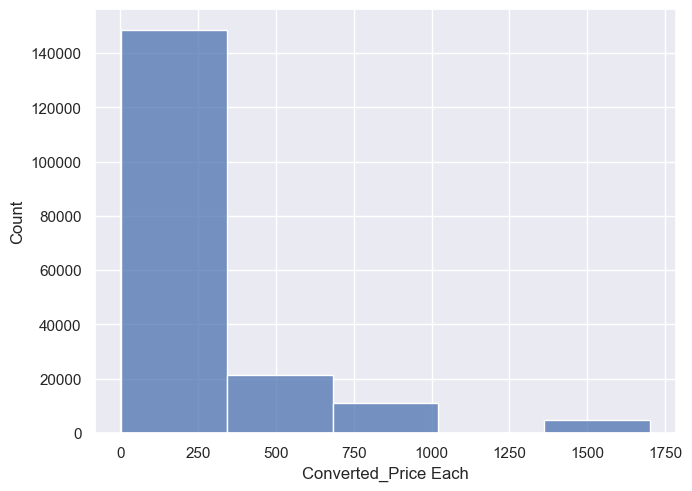

In [42]:
sns.histplot(all_data['Converted_Price Each'], bins = 5);

Observation: There are more observations in the lower price range and a very few on the higher price range. This appears to be Right-Skewed

## 19) Create a New Column with Month Name

In [43]:
all_data['Month'] = all_data['Converted_Order_Date'].dt.month_name(locale = 'English')

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,1,11.99,April


## 20) Check Count/Distribution of Month

In [45]:
all_data['Month'].value_counts()

December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: Month, dtype: int64

<AxesSubplot: xlabel='count', ylabel='Month'>

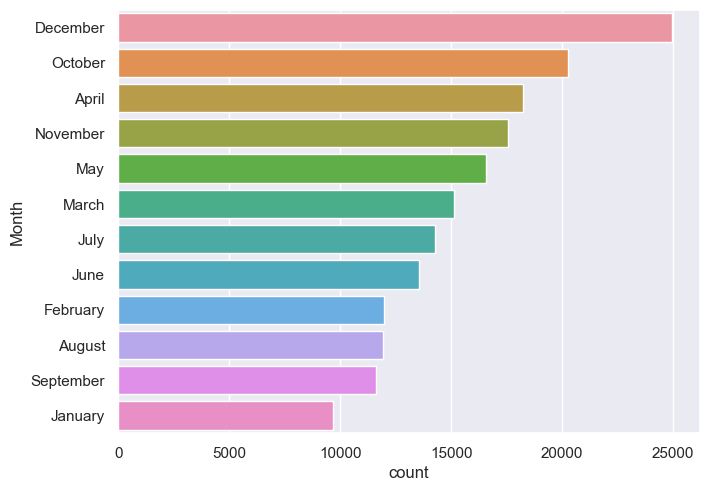

In [46]:
sns.countplot(y=all_data['Month'], order= all_data['Month'].value_counts().index)

Observation: December has the highest sales and January the least. More than 50% lesser

In [47]:
all_data.isnull().sum()

Order ID                      0
Product                       0
Quantity Ordered              0
Price Each                    0
Order Date                    0
Purchase Address              0
Converted_Order_Date          0
Converted_Quantity_Ordered    0
Converted_Price Each          0
Month                         0
dtype: int64

In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,1,11.99,April


## 21) Creating a New Column 'Sales'

In [49]:
all_data['Sales'] = all_data['Converted_Price Each'] * all_data['Converted_Quantity_Ordered']

In [50]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,1,11.99,April,11.99


## 22) Creating City and State Column for further analysis

In [51]:
all_data['City'] = all_data['Purchase Address'].str.split(',', expand = True)[1]

In [52]:
all_data['State'] = all_data['Purchase Address'].str.split(',', expand = True)[2].str.slice(1, 3)

In [53]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April,99.99,Boston,MA


## 23) Creating Hour Column

In [54]:
all_data['Hour'] = all_data['Converted_Order_Date'].dt.hour

## 24) Creating Minute Column

In [55]:
all_data['Minute'] = all_data['Converted_Order_Date'].dt.minute

# Q1 What was the best month for Sales

In [56]:
grp = all_data.groupby(by='Month')

In [57]:
grp.sum()

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\1833679344.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp.sum()


,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
Month,,,,,
April,20536,3366218.76,3389217.98,261916,543611
August,13429,2226963.90,2241083.37,172049,353246
December,28074,4583267.77,4608295.70,359431,731685
February,13431,2186940.38,2200078.08,172392,354307
January,10893,1810924.81,1821413.16,139339,282230
July,16054,2631225.12,2646461.32,205909,416896
June,15234,2560503.50,2576280.15,195223,401839
March,16979,2789084.64,2804973.35,218622,446783
May,18653,3133134.61,3150616.23,238580,487579


In [58]:
grp1 = grp.sum()

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\1307558788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp1 = grp.sum()


In [59]:
grp1.reset_index(inplace=True)

In [60]:
grp1

,Month,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
0,April,20536,3366218.76,3389217.98,261916,543611
1,August,13429,2226963.90,2241083.37,172049,353246
2,December,28074,4583267.77,4608295.70,359431,731685
3,February,13431,2186940.38,2200078.08,172392,354307
4,January,10893,1810924.81,1821413.16,139339,282230
5,July,16054,2631225.12,2646461.32,205909,416896
6,June,15234,2560503.50,2576280.15,195223,401839
7,March,16979,2789084.64,2804973.35,218622,446783
8,May,18653,3133134.61,3150616.23,238580,487579
9,November,19769,3178872.53,3197875.05,254430,517369


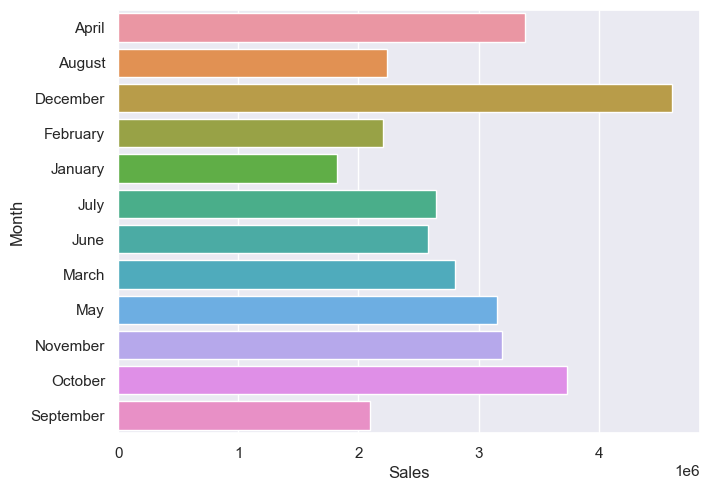

In [61]:
sns.barplot(x='Sales', y= 'Month',data= grp1);

In [62]:
grp1.sort_values(by='Sales')

,Month,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
4,January,10893,1810924.81,1821413.16,139339,282230
11,September,13091,2081897.65,2094465.69,168206,341151
3,February,13431,2186940.38,2200078.08,172392,354307
1,August,13429,2226963.90,2241083.37,172049,353246
6,June,15234,2560503.50,2576280.15,195223,401839
5,July,16054,2631225.12,2646461.32,205909,416896
7,March,16979,2789084.64,2804973.35,218622,446783
8,May,18653,3133134.61,3150616.23,238580,487579
9,November,19769,3178872.53,3197875.05,254430,517369
0,April,20536,3366218.76,3389217.98,261916,543611


Observation : December is the Month with the HIGHEST SALES 4608295.70 and January is the month with LOWEST SALES 1821413.16

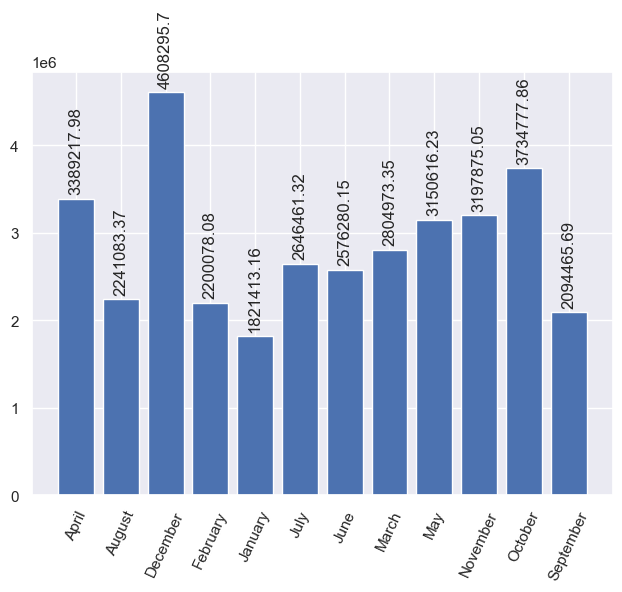

In [63]:
fig,ax = plt.subplots()
baarplot = ax.bar(x= grp1['Month'],height = grp1['Sales'])
ax.bar_label(baarplot, labels = grp1['Sales'],label_type = 'edge',padding = 3, rotation = 90)
plt.xticks(rotation = 65)
plt.show()

# Q2 What City had the highest number of Sales

In [64]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,1,11.99,April,11.99,Los Angeles,CA,9,27


In [65]:
grp_2_city = all_data.groupby('City')

In [66]:
grp_2_city = grp_2_city.sum()

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\3260940440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_2_city = grp_2_city.sum()


In [67]:
grp_2_city.head()

,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
City,,,,,
Atlanta,16584,2778608.69,2794199.07,214003,442412
Austin,11137,1808340.03,1818044.33,141688,288674
Boston,22494,3634398.40,3658627.65,287705,589414
Dallas,16707,2750026.38,2765373.96,214078,434330
Los Angeles,33247,5417171.70,5448304.28,426924,865442


In [68]:
grp_2_city.reset_index(inplace= True)

In [69]:
all_data['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [70]:
grp_2_city.sort_values(by='Sales',ascending = False)

,City,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
7,San Francisco,50169,8204001.38,8254743.55,642269,1317094
4,Los Angeles,33247,5417171.70,5448304.28,426924,865442
5,New York City,27903,4632920.54,4661867.14,357214,733011
2,Boston,22494,3634398.40,3658627.65,287705,589414
0,Atlanta,16584,2778608.69,2794199.07,214003,442412
3,Dallas,16707,2750026.38,2765373.96,214078,434330
8,Seattle,16534,2730586.55,2745046.02,213005,435899
6,Portland,14037,2306588.80,2319331.94,179394,367847
1,Austin,11137,1808340.03,1818044.33,141688,288674


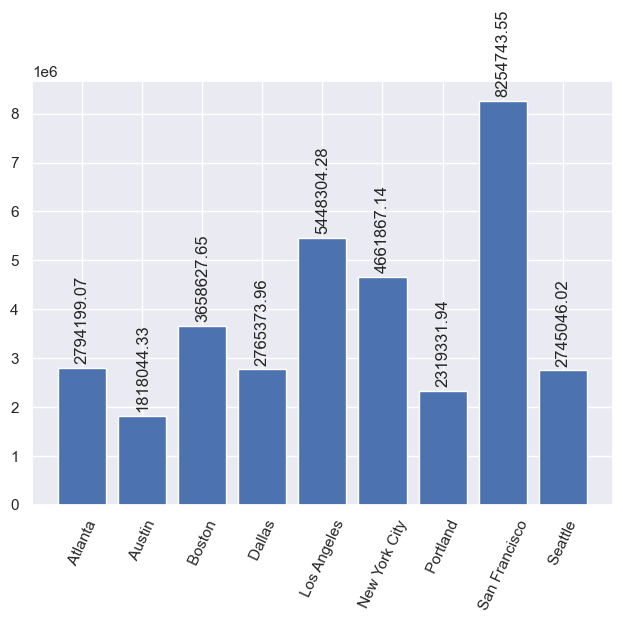

In [71]:
fig,ax = plt.subplots()
baarplot2 = ax.bar(x= grp_2_city['City'],height = grp_2_city['Sales'])
ax.bar_label(baarplot2, labels = grp_2_city['Sales'],label_type = 'edge',padding = 3, rotation = 90)
plt.xticks(rotation = 65)
plt.show()

Observation: SAN FRANCISCO has the HIGHEST SALES among other Cities. Lowest being AUSTIN

# Q3 What State had the highest number of Sales

In [72]:
grp_3_state = all_data.groupby('State')

In [73]:
grp_3_state = grp_3_state.sum()

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\3825748626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_3_state = grp_3_state.sum()


In [74]:
grp_3_state.reset_index(inplace= True)

In [75]:
grp_3_state

,State,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
0,CA,83416,13621173.08,13703047.83,1069193,2182536
1,GA,16584,2778608.69,2794199.07,214003,442412
2,MA,22494,3634398.40,3658627.65,287705,589414
3,ME,2746,446752.36,449321.38,35152,72743
4,NY,27903,4632920.54,4661867.14,357214,733011
5,OR,11291,1859836.44,1870010.56,144242,295104
6,TX,27844,4558366.41,4583418.29,355766,723004
7,WA,16534,2730586.55,2745046.02,213005,435899


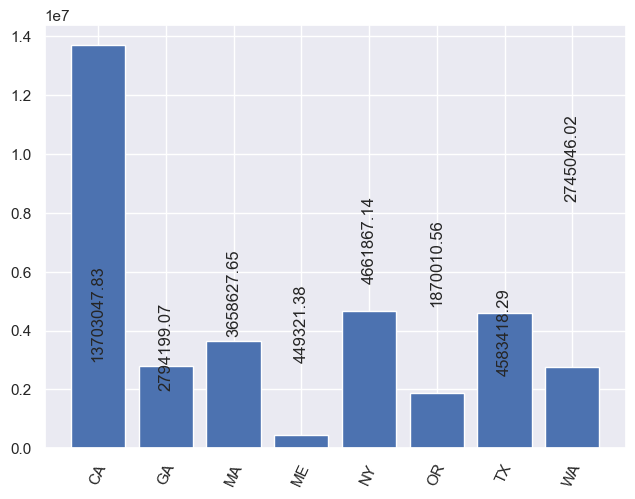

In [76]:
fig,ax = plt.subplots()
baarplot3 = ax.bar(x= grp_3_state['State'],height = grp_3_state['Sales'])
ax.bar_label(baarplot2, labels = grp_3_state['Sales'],label_type = 'edge',padding = 3, rotation = 90)
plt.xticks(rotation = 65)
plt.show()

Observation: CALIFORNIA (CA) has the highet sales among other States. Lowest being ME 

# Q4 What time should we display advertisements to maximize likelihood of customer's buying product

In [77]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,1,11.99,April,11.99,Los Angeles,CA,9,27


In [78]:
grp_5_hour = all_data.groupby('Hour')
grp_5_hour = grp_5_hour.count()


In [79]:
grp_5_hour.reset_index(inplace=True)

In [80]:
grp_5_hour.head()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State,Minute
0,0,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902
1,1,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
2,2,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
3,3,830,830,830,830,830,830,830,830,830,830,830,830,830,830
4,4,852,852,852,852,852,852,852,852,852,852,852,852,852,852


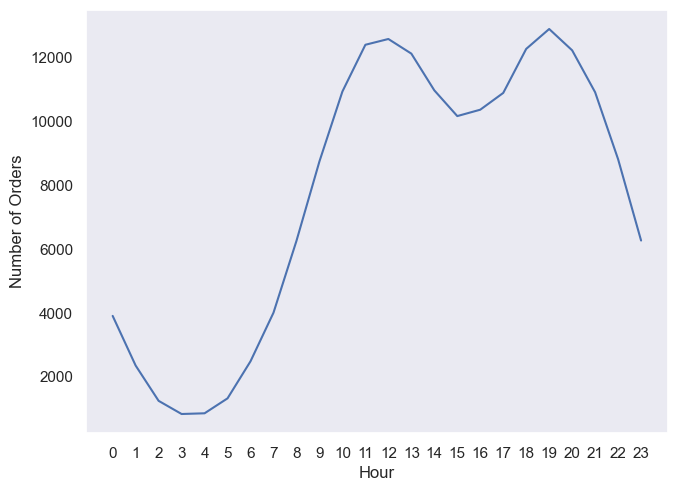

In [81]:
plt.plot(grp_5_hour['Hour'],grp_5_hour['Sales'])
plt.xticks(grp_5_hour['Hour'])
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

Observation: Around 11am or 7pm(19)

# Q5 What products are most often bought together

In [82]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2,11.95,April,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,1,99.99,April,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,1,11.99,April,11.99,Los Angeles,CA,9,27


In [83]:
df_new = all_data[all_data['Order ID'].duplicated(keep=False)]

In [84]:
df_new.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State,Hour,Minute
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April,11.99,Los Angeles,CA,14,38
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,1,600.00,April,600.00,Los Angeles,CA,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,1,11.95,April,11.95,Los Angeles,CA,19,42
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,2,2.99,April,5.98,San Francisco,CA,17,0
33,176586,Google Phone,1,600,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,1,600.00,April,600.00,San Francisco,CA,17,0
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",2019-04-12 11:07:00,1,14.95,April,14.95,New York City,NY,11,7
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",2019-04-12 11:07:00,1,11.95,April,11.95,New York City,NY,11,7
129,176681,Apple Airpods Headphones,1,150,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",2019-04-20 10:39:00,1,150.00,April,150.00,Seattle,WA,10,39
130,176681,ThinkPad Laptop,1,999.99,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",2019-04-20 10:39:00,1,999.99,April,999.99,Seattle,WA,10,39


## Grouping all the Order ID with Products

In [85]:
df_new['Grouped']= df_new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\1886613427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Grouped']= df_new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [86]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Converted_Order_Date,Converted_Quantity_Ordered,Converted_Price Each,Month,Sales,City,State,Hour,Minute,Grouped
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,600.00,April,600.00,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,1,11.99,April,11.99,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,1,600.00,April,600.00,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,1,11.95,April,11.95,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,2,2.99,April,5.98,San Francisco,CA,17,0,"AAA Batteries (4-pack),Google Phone"


In [87]:
df_new= df_new[['Order ID', 'Grouped']].drop_duplicates()

In [88]:
df_new.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"


## Creating counter for the Grouped Column

In [89]:
count = Counter()

for row in df_new['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))



for key,value in count.most_common(15):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


Recommendation: Run a Discount on ('iPhone', 'Lightning Charging Cable') between 3pm and 6pm. Also, can bundle ('Lightning Charging Cable', 'USB-C Charging Cable') and provide extra discount if both the products are bought together to increase sales.

# Q6 What product sold the most? Why did it sell the most

In [90]:
all_data.groupby('Product').sum()

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\3709533879.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Product').sum()


,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
Product,,,,,
20in Monitor,4126,450739.02,453818.74,58729,122096
27in 4K Gaming Monitor,6239,2427687.75,2433147.61,90841,184129
27in FHD Monitor,7541,1124625.02,1131074.59,107422,219659
34in Ultrawide Monitor,6192,2346058.26,2352898.08,88957,183318
AA Batteries (4-pack),27615,78942.72,106041.60,298077,608560
AAA Batteries (4-pack),30986,61629.88,92648.14,296904,611350
Apple Airpods Headphones,15637,2328750.00,2345550.00,222938,454935
Bose SoundSport Headphones,13430,1329667.02,1342865.70,192077,391667
Flatscreen TV,4813,1438200.00,1443900.00,68719,142629


In [91]:
grp_6_product = all_data.groupby('Product').sum()

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\2551967469.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_6_product = all_data.groupby('Product').sum()


In [92]:
grp_6_product.reset_index(inplace=True)

In [93]:
grp_6_product.head()

,Product,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
0,20in Monitor,4126,450739.02,453818.74,58729,122096
1,27in 4K Gaming Monitor,6239,2427687.75,2433147.61,90841,184129
2,27in FHD Monitor,7541,1124625.02,1131074.59,107422,219659
3,34in Ultrawide Monitor,6192,2346058.26,2352898.08,88957,183318
4,AA Batteries (4-pack),27615,78942.72,106041.60,298077,608560


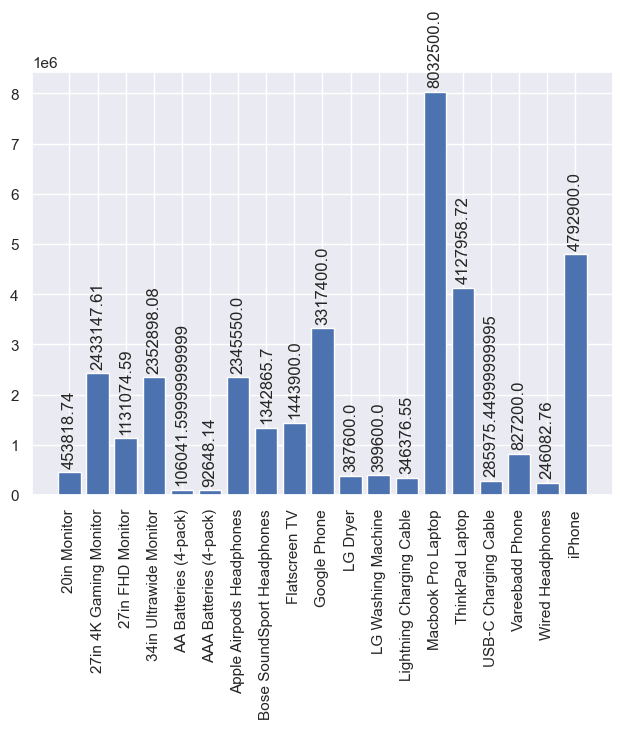

In [94]:
fig,ax = plt.subplots()
baarplot5 = ax.bar(x= grp_6_product['Product'],height = grp_6_product['Sales'])
ax.bar_label(baarplot5, labels = grp_6_product['Sales'],label_type = 'edge',padding = 3, rotation = 90)
plt.xticks(rotation = 90)
plt.show()

Observation: Macbook Pro Laptop is the most sold Product

In [95]:
all_data.groupby(by='Product').sum().sort_values(by='Sales', ascending=False)

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15640\1355968766.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(by='Product').sum().sort_values(by='Sales', ascending=False)


,Converted_Quantity_Ordered,Converted_Price Each,Sales,Hour,Minute
Product,,,,,
Macbook Pro Laptop,4725,8025700.00,8032500.00,68225,137440
iPhone,6847,4788000.00,4792900.00,98617,201604
ThinkPad Laptop,4128,4125958.74,4127958.72,59713,121447
Google Phone,5529,3313200.00,3317400.00,79438,162678
27in 4K Gaming Monitor,6239,2427687.75,2433147.61,90841,184129
34in Ultrawide Monitor,6192,2346058.26,2352898.08,88957,183318
Apple Airpods Headphones,15637,2328750.00,2345550.00,222938,454935
Flatscreen TV,4813,1438200.00,1443900.00,68719,142629
Bose SoundSport Headphones,13430,1329667.02,1342865.70,192077,391667


# Doing a quick Data Profiling using Sweetvz

In [96]:
my_report = sv.analyze(all_data)

c:\Users\Abhay\Visual_Studio_projects\Sales_Analysis\venv\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Abhay\Visual_Studio_projects\Sales_Analysis\venv\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: Order ID                            |▋         | [  6%]   00:01 -> (00:22 left)c:\Users\Abhay\Visual_Studio_projects\Sales_Analysis\venv\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: Product      


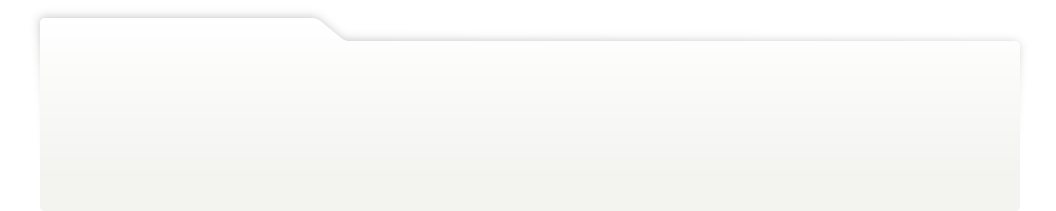
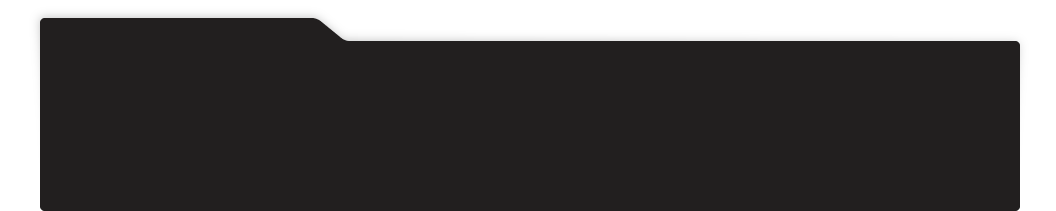
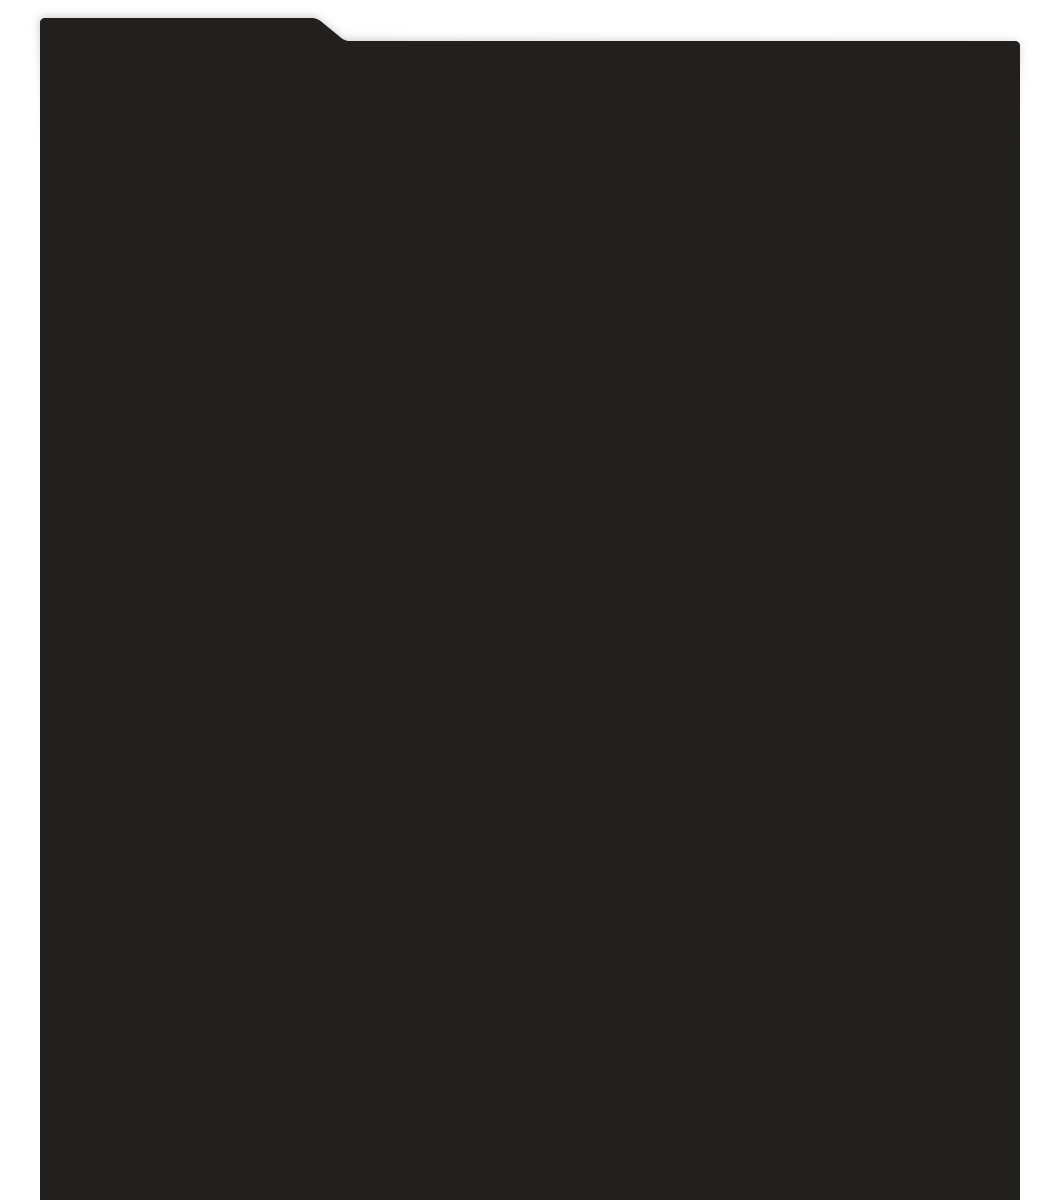
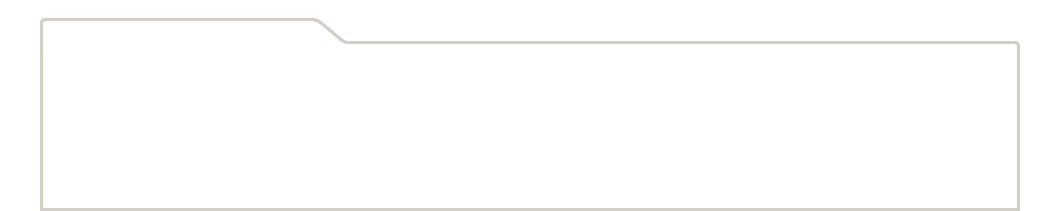
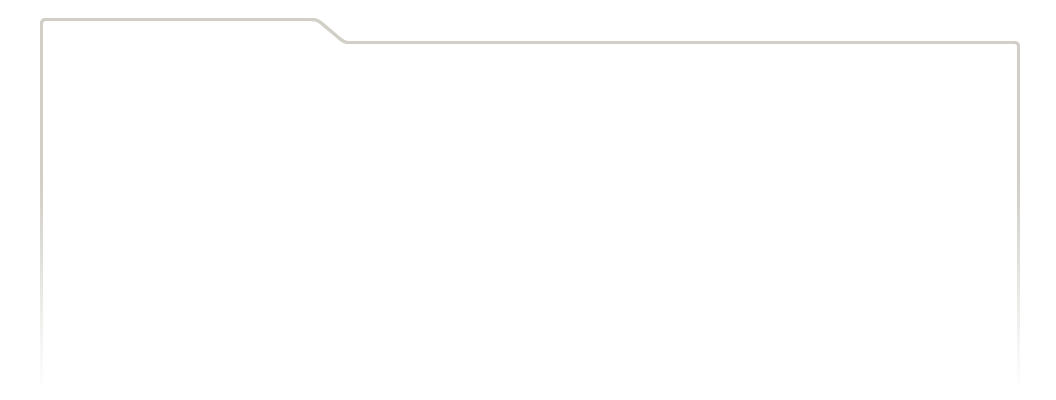
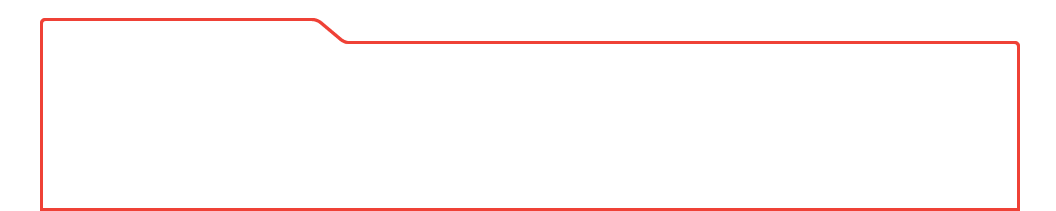
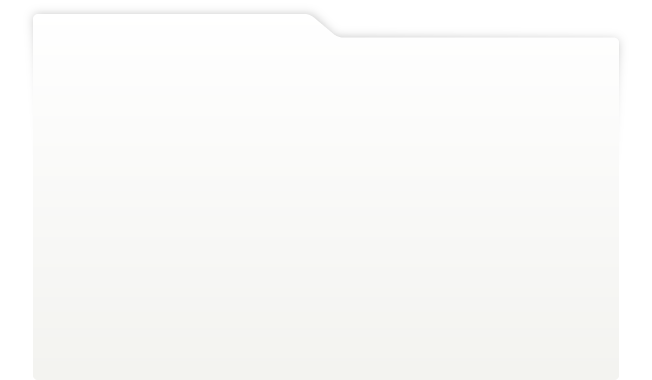
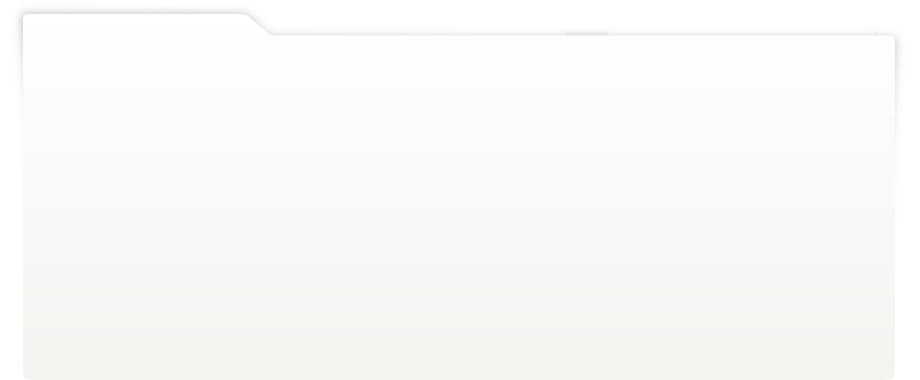
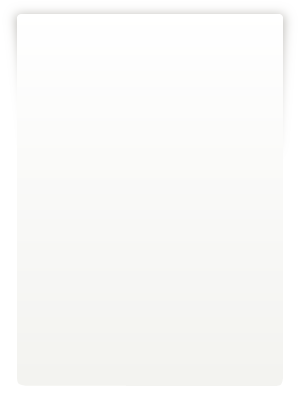
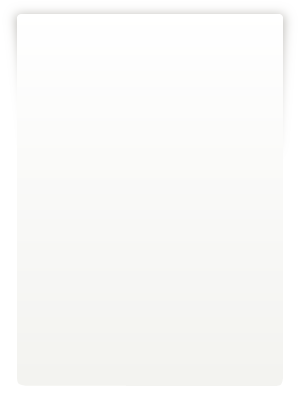
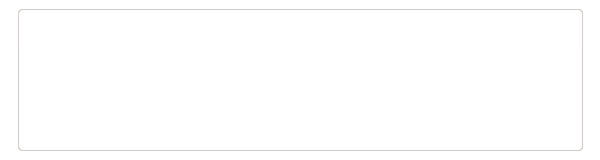
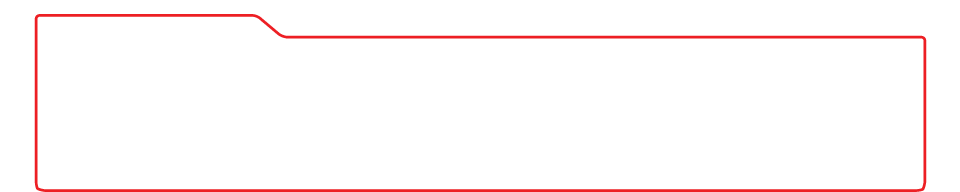
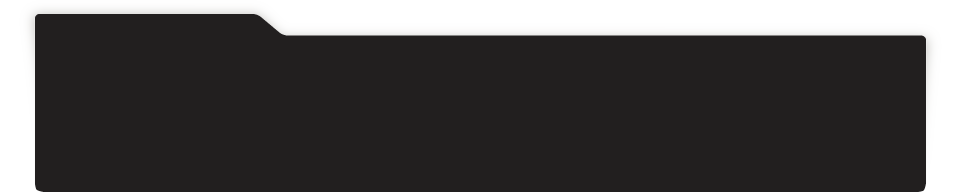
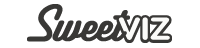
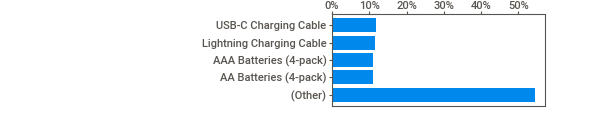
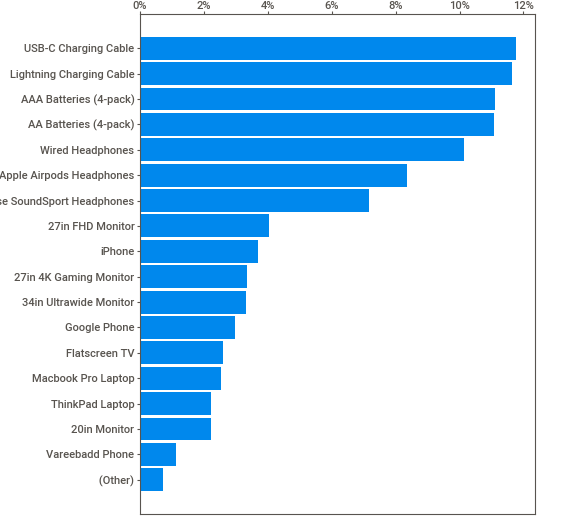
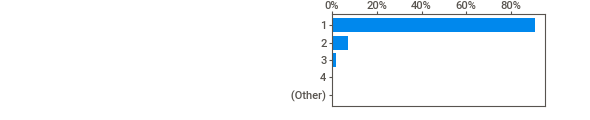
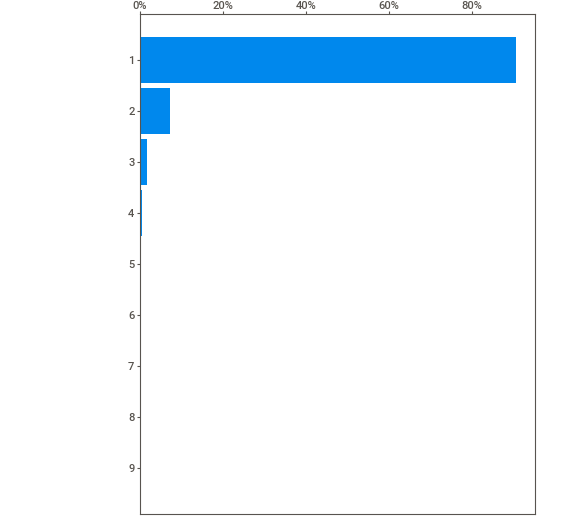
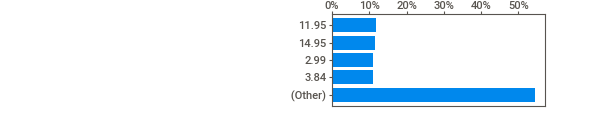
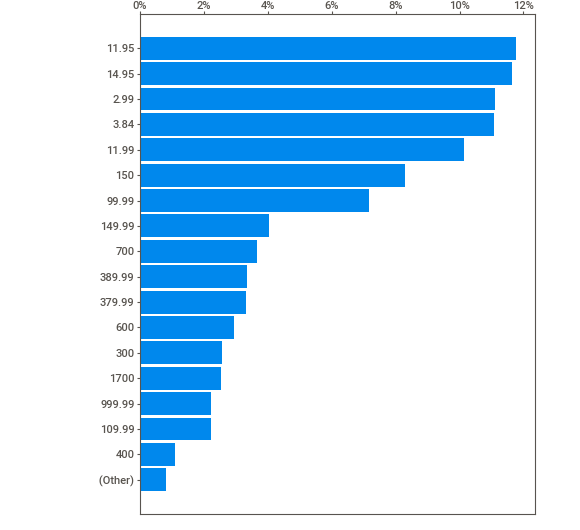
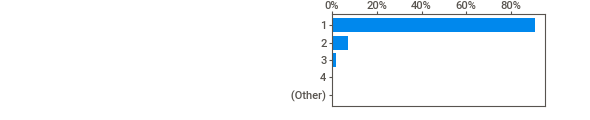
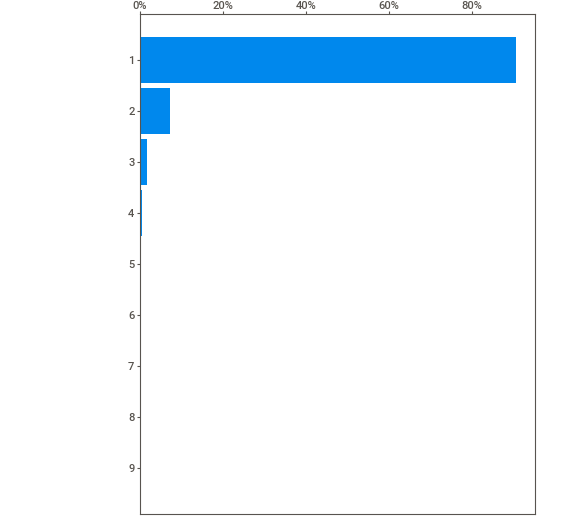
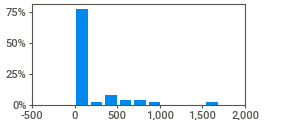
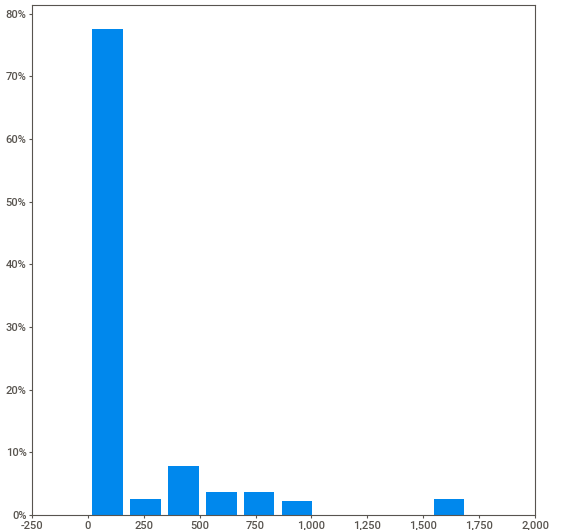
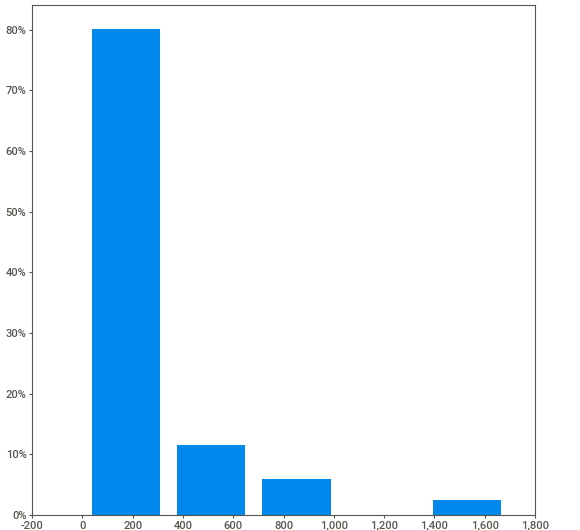
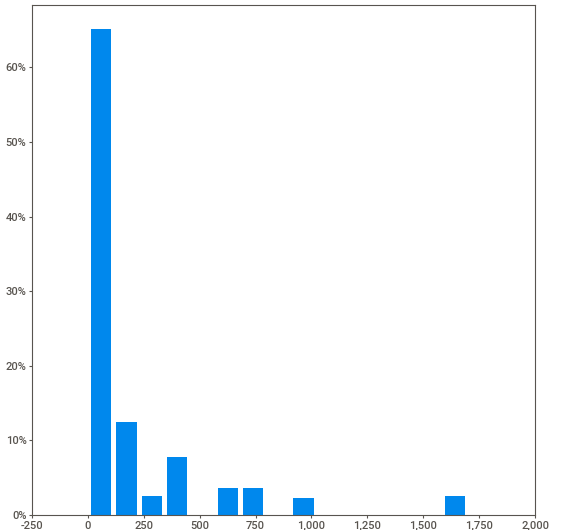
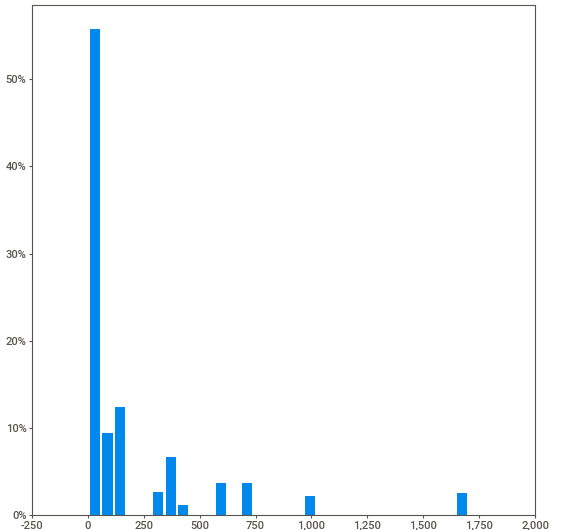
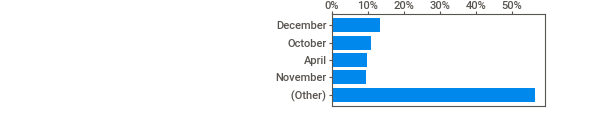
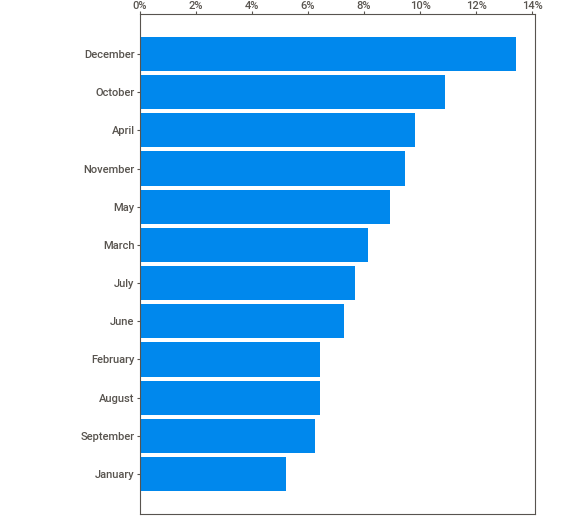
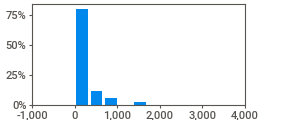
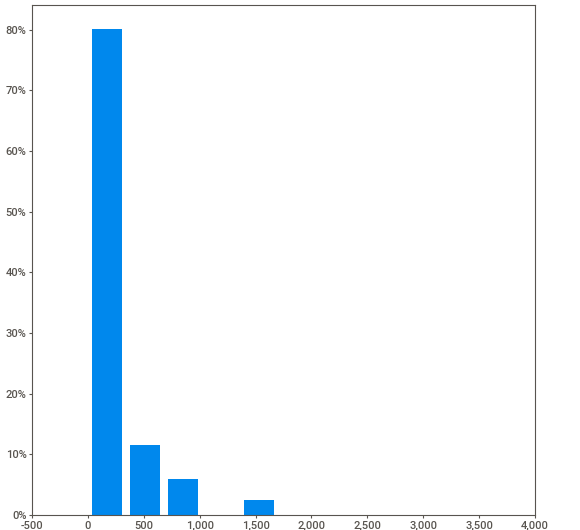
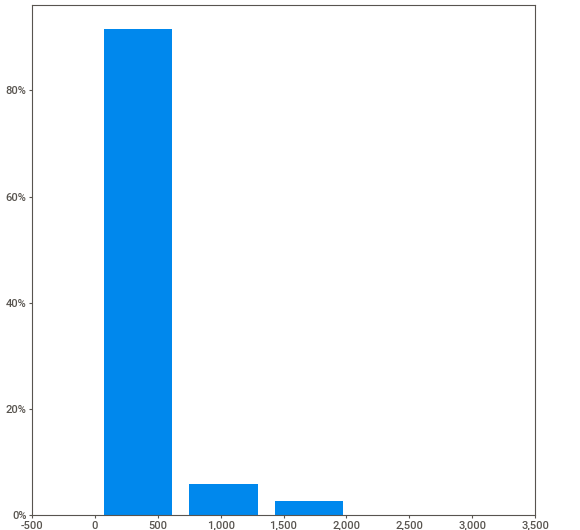
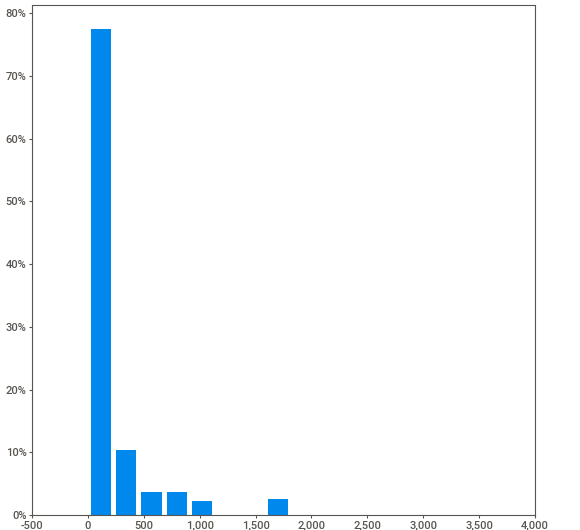
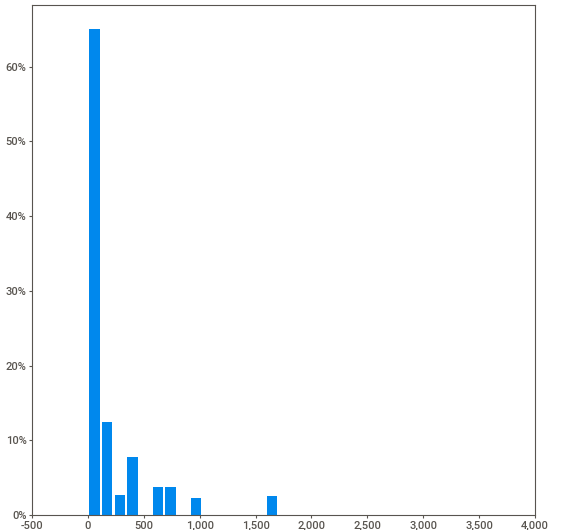
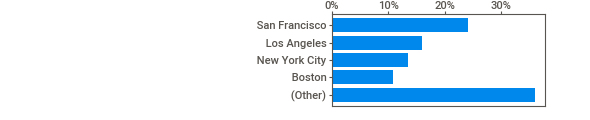
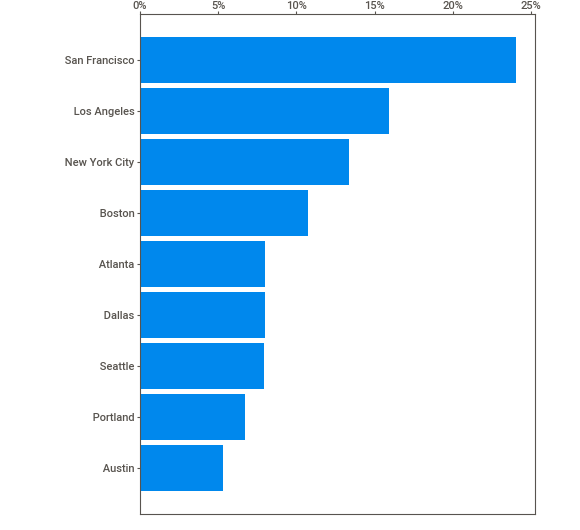
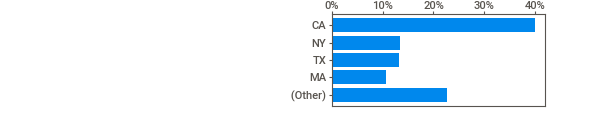
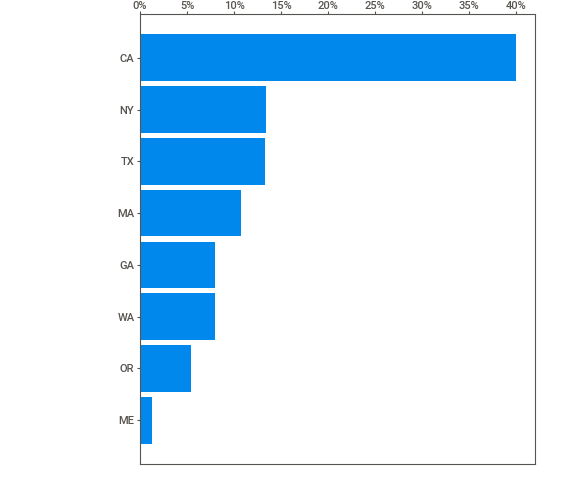
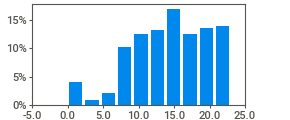
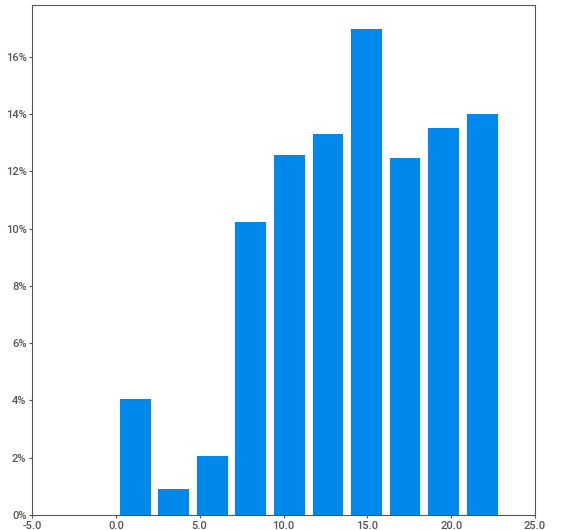
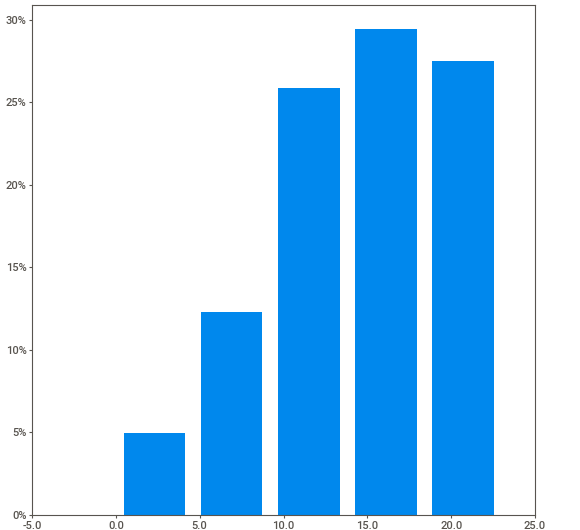
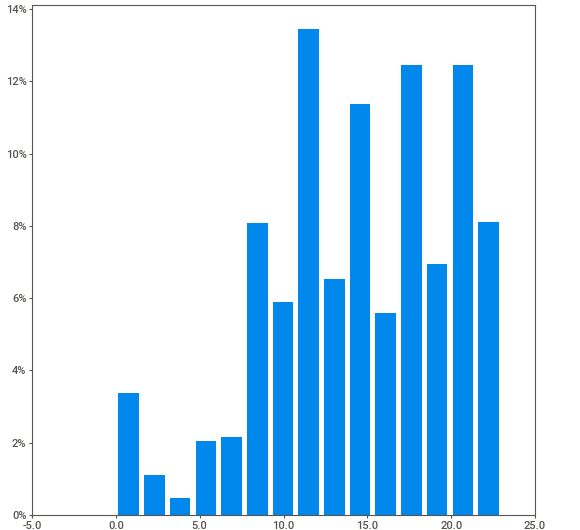
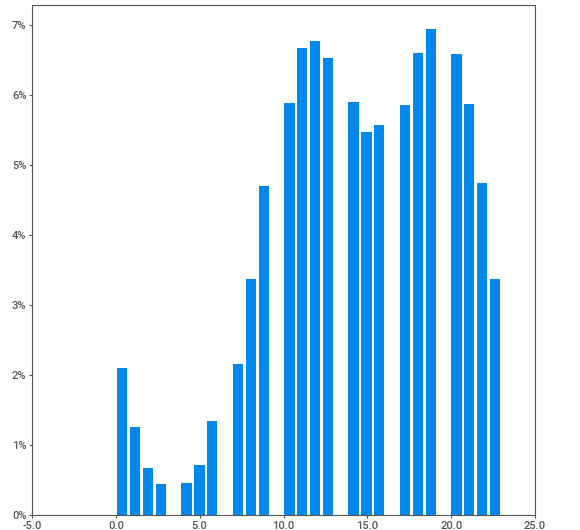
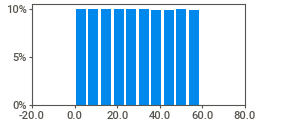
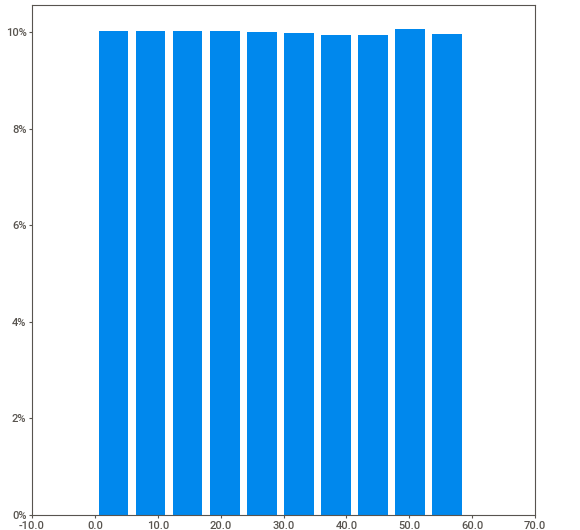
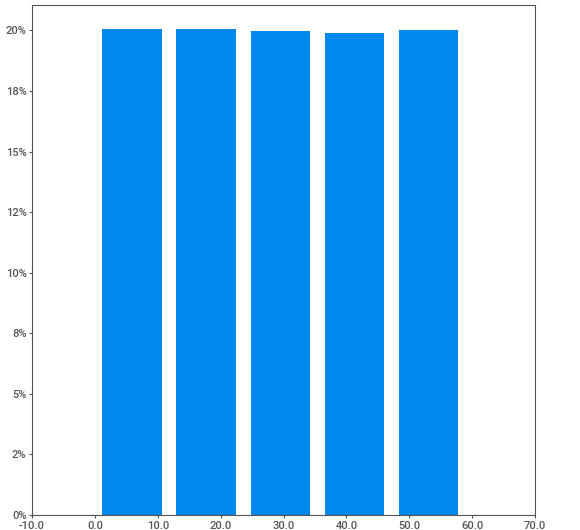
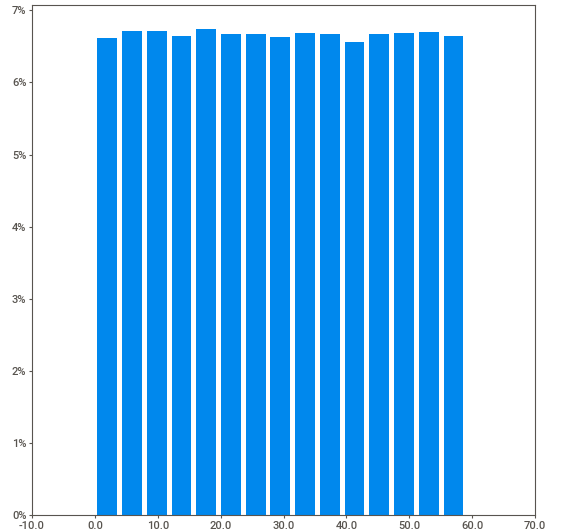
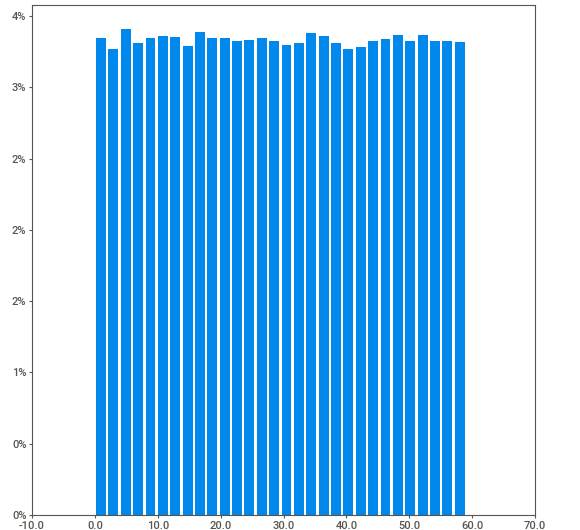
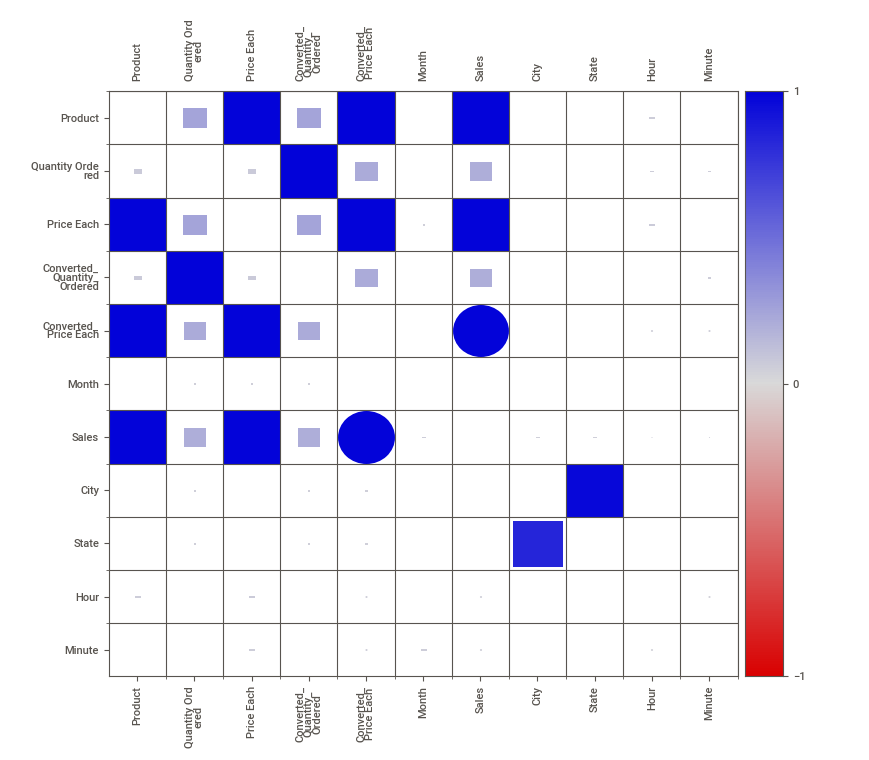
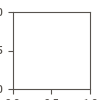

In [99]:
my_report.show_notebook(w=None, h=None,
scale=None,
layout='widescreen')